Importing Libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2
from PIL import Image

import tensorflow as tf 
tf.random.set_seed(3) # setting for all
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST data from keras.datasets

In [4]:
#all labels stored in y_train
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [5]:
type(X_train)

numpy.ndarray

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data: 60,000 images

Test Data: 10,000 images

All are Grayscale images: 1 channel

Image dimensions: 28 x 28

In [7]:
#print 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


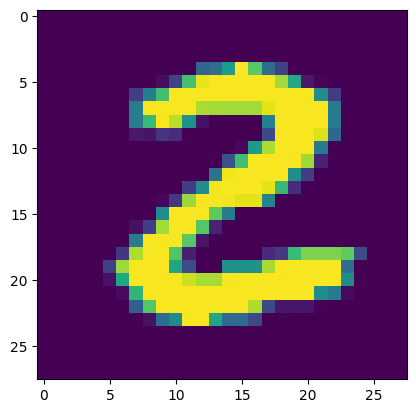

2


In [9]:
#convert array to image 
plt.imshow(X_train[25])
plt.show()

#print corresponding label
print(y_train[25])

Image Labels

In [10]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [11]:
#unique values in y-axis
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Can use labels as such or can also apply one hot encoding

All images have same dimension, else resize all 

In [12]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

min value =0/255=0
(we divide by 255 as it is max value)

max value= 255/255=1
therefore all values between 0 and 1

In [13]:
print(X_train[25])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a Simple Neural Network

In [14]:
#setting up layers of neural network

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #should add one more 3 in the end if rgb images
    keras.layers.Dense(50, activation='relu'), #50 neurons
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #output
]

)

In [15]:
#compiling the neural network
model.compile(loss= 'sparse_categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy'])

In [16]:
#training neural network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2905 - accuracy: 0.9155
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1354 - accuracy: 0.9598
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1013 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0829 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0674 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0592 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0494 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0444 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0394 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.033

Training Data Accuray= 98.9%

Accuracy on Test:

In [17]:
loss, accuracy= model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.9719
0.9718999862670898


Test Data Accuracy= 97.33%

In [18]:
print(X_test.shape)

(10000, 28, 28)


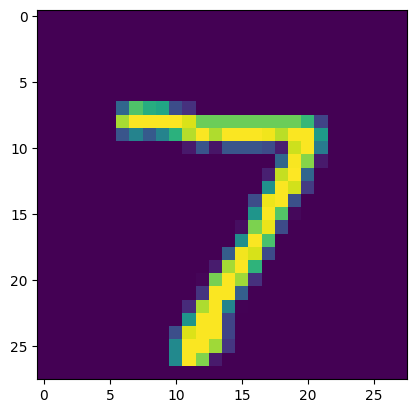

In [19]:
plt.imshow(X_test[0])
plt.show()

In [20]:
print(y_test[0])

7


In [21]:
#checking prediction of model
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
print(y_pred.shape)

(10000, 10)


In [23]:
print(y_pred[0])

[3.0430735e-03 4.1171494e-03 8.6433542e-01 9.7190142e-01 2.5115460e-05
 6.4744730e-04 3.7108019e-09 9.9999988e-01 6.6883350e-03 5.1369929e-01]


model.predict() shows probability of each number from 0-9

In [24]:
#converting prediction to class

label_first= np.argmax(y_pred[0])
print(label_first)

7


In [25]:
#converting prediction probability for all test data
y_pred_label= [np.argmax(i) for i in y_pred]
print(y_pred_label)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [26]:
cm=confusion_matrix(y_test, y_pred_label)
print(cm)

tf.Tensor(
[[ 965    1    0    1    0    6    3    1    1    2]
 [   0 1126    2    1    0    1    1    0    4    0]
 [   4    0 1006    7    2    0    0    9    4    0]
 [   0    0    3  983    0   13    0    4    4    3]
 [   2    0    3    0  951    2    3    5    1   15]
 [   1    0    0    4    2  878    2    1    0    4]
 [   2    4    1    2    5   25  915    0    2    2]
 [   1    6    6    1    1    1    0 1011    0    1]
 [   3    1    4   13    8   23    1    7  909    5]
 [   1    2    0    6   10    4    1    9    2  974]], shape=(10, 10), dtype=int32)


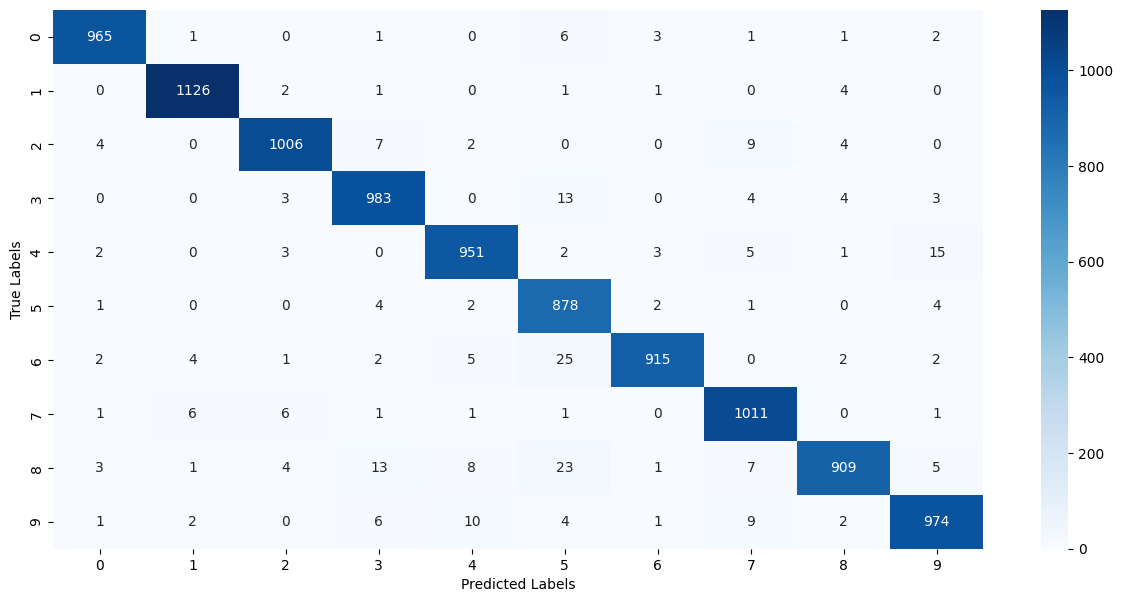

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #fmt= d means integers all values are
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

Build a predictieve system

In [28]:
input_path= 'C:\\Users\\LENOVO\\Desktop\\projects\\digit classification\\MNIST_digit.png' 
input_image=cv2.imread(input_path)

In [29]:
type(input_image)

numpy.ndarray

In [30]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [31]:
cv2.imshow('Input Image',input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
input_image.shape

(318, 318, 3)

In [33]:
#this is considering as rgb image so convert to grascale and resize
grayscale= cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(318, 318)

In [35]:
input_image_resize=cv2.resize(grayscale, (28,28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
cv2.imshow('Input Image',input_image_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
input_image_resize=input_image_resize/255 #scaling values

In [39]:
image_reshaped=np.reshape(input_image_resize, [1,28,28]) #we tell network we are only giving 1 value

In [40]:
input_pred=model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 27ms/step
[[5.6502140e-11 8.8287756e-04 1.8713107e-02 1.0000000e+00 1.6791414e-10
  1.9140723e-01 3.3470752e-17 9.7513586e-02 1.5727142e-02 9.9341053e-01]]


In [41]:
input_label=np.argmax(input_pred)
print(input_label)

3
